# Importações

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix;
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Carregamento e Preparação dos Dados

Esta seção é responsável por **carregar o dataset California Housing** e **extrair as variáveis** que serão utilizadas no modelo. `MedInc` (renda média por bloco) é definida como a **feature de entrada** (`X_train`), e `MedHouseVal` (valor médio da casa) é a **variável alvo** (`y_train`) que o modelo tentará prever. Os dados são carregados diretamente como um DataFrame do Pandas para facilitar a manipulação.

In [32]:
housing = fetch_california_housing(as_frame=True)
housing = housing.frame

X_train = housing['MedInc']
y_train = housing['MedHouseVal']

# Análise Exploratória de Dados (AED) - Visualização Inicial

Esta linha de código gera **histogramas para todas as colunas do dataset `housing`**. Isso permite uma rápida **análise da distribuição de cada variável**, ajudando a identificar padrões, assimetrias, outliers e a faixa de valores. O parâmetro `bins=50` define o número de "barras" do histograma para uma visualização detalhada, e `figsize=(12,8)` ajusta o tamanho da figura para melhor legibilidade.

**Histogramas de Todas as Variáveis**

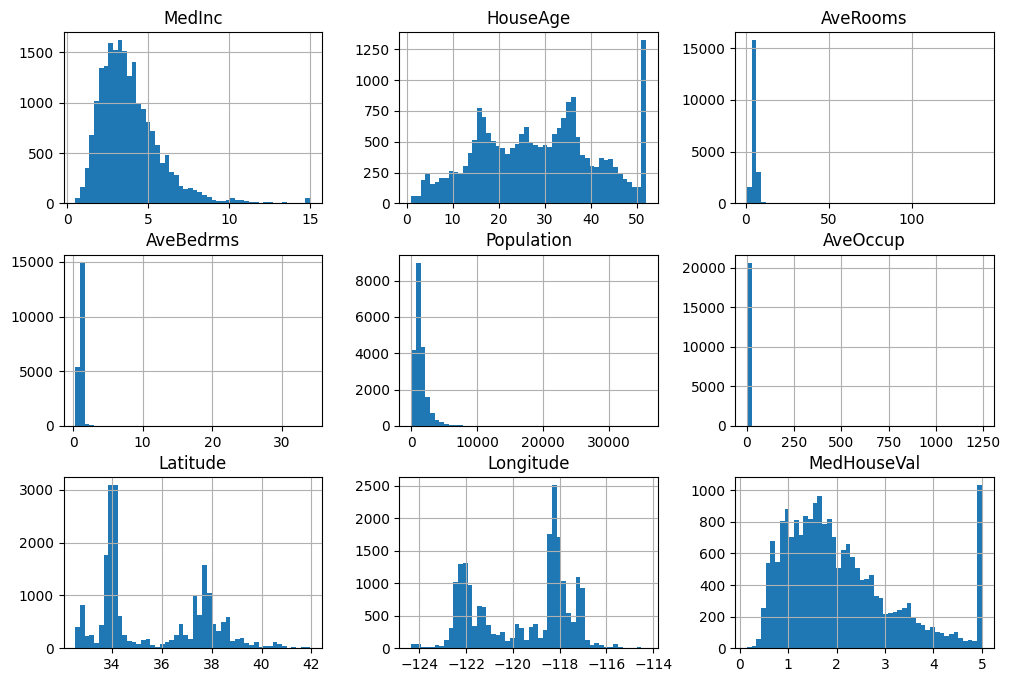

In [33]:
housing.hist(bins=50, figsize=(12,8))
plt.show()

**Mapa de Dispersão Geográfico com Valor Imobiliário**

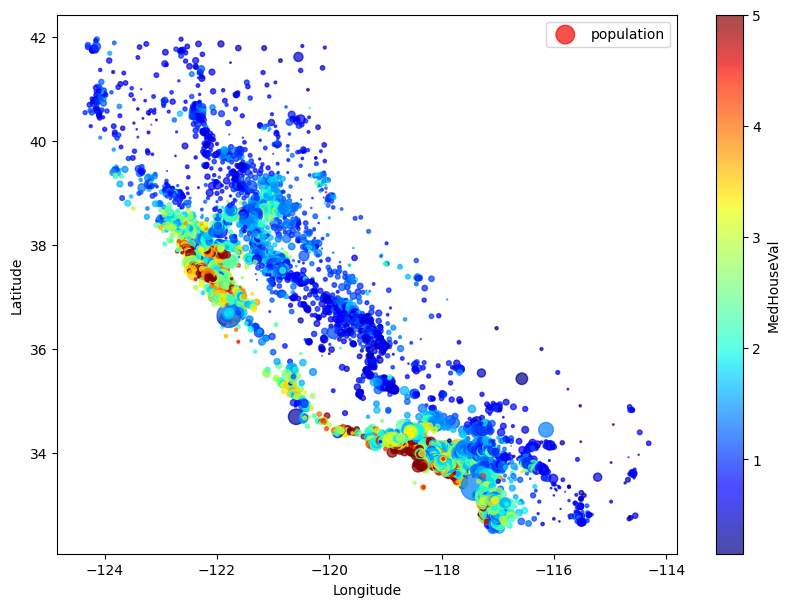

In [34]:
housing.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=housing['Population']/100, label="population", alpha=0.7)
plt.show()

**Matriz de Dispersão de Atributos Chave**

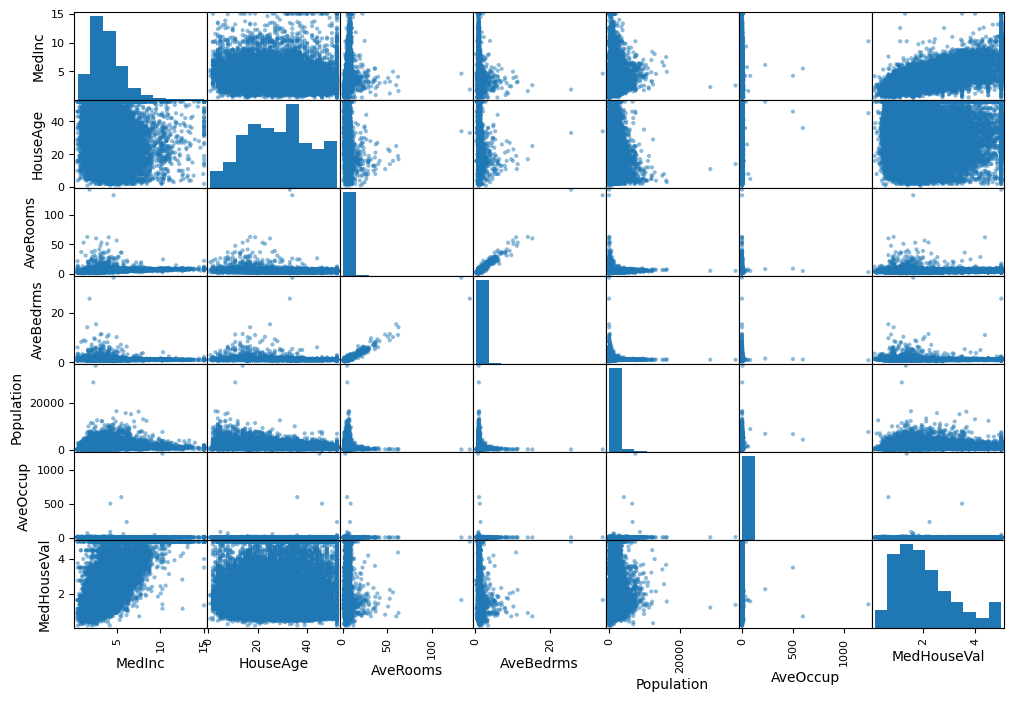

In [35]:
attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','MedHouseVal']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

**Dispersão da Relação entre Renda e Valor do Imóvel**

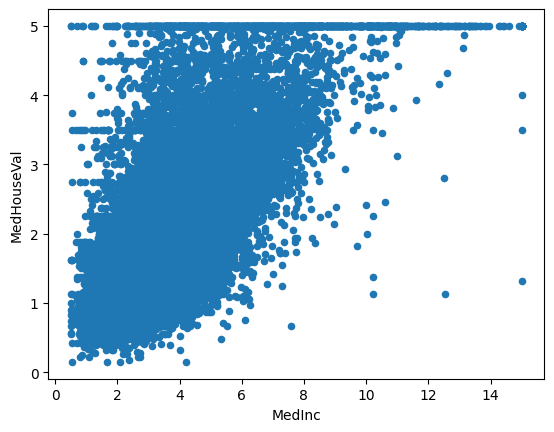

In [36]:
housing.plot(kind="scatter", x="MedInc",y="MedHouseVal")
plt.show()

# A Função de Custo (Onde a Mágica Acontece para Saber o Erro!)

Essa aqui é a nossa **`loss_function`**, a parte do código que nos diz o quão "ruim" ou "boa" a nossa linha de regressão está. Basicamente, ela calcula o **Erro Quadrático Médio (MSE)**. Pensa assim: ela pega a diferença entre o valor que a gente *previu* com a nossa linha e o valor *real*, eleva ao quadrado (pra não ter número negativo e dar peso maior para erros grandes) e tira a média de tudo isso.

Quanto menor for esse número final, significa que a nossa linha está mais pertinho dos pontos de dados, ou seja, está mais bem ajustada! É a nossa bússola pra saber se estamos no caminho certo.

In [37]:
def loss_function(m, b, X_train, y_train):
  total_error = 0
  for i in range(len(X_train)):
    x = X_train.iloc[i]
    y = y_train.iloc[i]
    total_error += (y - (m * x + b)) ** 2
  return total_error / float(len(X_train))

# Gradient Descent: O Motor do Nosso Aprendizado

Essa é a **`gradient_descent`**, a função que realmente faz nosso modelo aprender! Basicamente, ela pega os nossos parâmetros atuais (`m_now` e `b_now`), vê qual é a inclinação (o "gradiente") do erro em relação a eles, e depois ajusta esses parâmetros um pouquinho na direção que diminui o erro.

Pensa nela como um alpinista tentando descer uma montanha (a montanha é o erro, e o fundo é onde o erro é mínimo). A cada passo, ela olha a inclinação ao redor (`m_gradient` e `b_gradient`) e desce um pouco na direção mais íngreme para baixo. A `L` (taxa de aprendizado ou *learning rate*) é o tamanho do passo que ela dá. Um passo muito grande pode te fazer errar o vale, um passo muito pequeno leva muito tempo pra chegar lá.

No final de cada "passo" (ou iteração), ela nos devolve um `m` e um `b` um pouco melhores que os anteriores.

In [38]:
def gradient_descent(m_now, b_now, X_train, y_train, L):
  m_gradient = 0
  b_gradient = 0

  n = len(X_train)

  for i in range(n):

    x = X_train.iloc[i]
    y = y_train.iloc[i]
    m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
    b_gradient += -(2/n) * (y - (m_now * x + b_now))

  m = m_now - m_gradient * L
  b = b_now - b_gradient * L

  return m, b

# Configuração e Treinamento do Modelo

Aqui é onde damos a partida no nosso algoritmo de **Gradiente Descendente**! Definimos os parâmetros iniciais e rodamos o treinamento.

* **`m = 0` e `b = 0`**: Começamos com nossos parâmetros (coeficiente angular e linear da linha) zerados. É o nosso ponto de partida.
* **`L = 0.0001`**: Essa é a **taxa de aprendizado (learning rate)**. Ela controla o tamanho dos "passos" que o algoritmo dá a cada iteração para ajustar `m` e `b`. Um valor bem ajustado aqui é crucial para o treinamento ser eficiente.
* **`epochs = 1000`**: Define o número de **épocas**, ou seja, quantas vezes o algoritmo vai "ver" todos os dados de treinamento e ajustar os parâmetros. Cada época é um ciclo completo de aprendizado.

O `for` loop executa o `gradient_descent` repetidamente, refinando `m` e `b` a cada iteração. A cada 10 épocas, a gente dá uma olhadinha no `m`, `b` e no `Loss` (o erro) pra acompanhar o progresso. No final, imprimimos os valores finais que o nosso modelo aprendeu.

In [42]:
m = 0
b = 0
L = 0.0001
epochs = 1000

print("Starting Gradient Descent...")
for i in range(epochs):
  m, b = gradient_descent(m, b, X_train, y_train, L)
  if (i % 10 == 0):
     current_loss = loss_function(m, b, X_train, y_train)
     print(f"Epoch: {i}, m: {m:.4f}, b: {b:.4f}, Loss: {current_loss:.4f}")

print(f"\nFinal m: {m:.4f}")
print(f"Final b: {b:.4f}")
print(f"Final Loss: {loss_function(m, b, X_train, y_train):.4f}")

Starting Gradient Descent...
Epoch: 0, m: 0.0019, b: 0.0004, Loss: 5.5726
Epoch: 10, m: 0.0205, b: 0.0045, Loss: 5.2099
Epoch: 20, m: 0.0384, b: 0.0084, Loss: 4.8742
Epoch: 30, m: 0.0557, b: 0.0121, Loss: 4.5637
Epoch: 40, m: 0.0723, b: 0.0157, Loss: 4.2764
Epoch: 50, m: 0.0882, b: 0.0192, Loss: 4.0106
Epoch: 60, m: 0.1035, b: 0.0226, Loss: 3.7647
Epoch: 70, m: 0.1183, b: 0.0258, Loss: 3.5372
Epoch: 80, m: 0.1325, b: 0.0289, Loss: 3.3268
Epoch: 90, m: 0.1461, b: 0.0320, Loss: 3.1320
Epoch: 100, m: 0.1592, b: 0.0348, Loss: 2.9519
Epoch: 110, m: 0.1718, b: 0.0376, Loss: 2.7852
Epoch: 120, m: 0.1840, b: 0.0403, Loss: 2.6310
Epoch: 130, m: 0.1956, b: 0.0429, Loss: 2.4883
Epoch: 140, m: 0.2069, b: 0.0454, Loss: 2.3563
Epoch: 150, m: 0.2177, b: 0.0478, Loss: 2.2342
Epoch: 160, m: 0.2280, b: 0.0501, Loss: 2.1212
Epoch: 170, m: 0.2380, b: 0.0524, Loss: 2.0166
Epoch: 180, m: 0.2476, b: 0.0545, Loss: 1.9199
Epoch: 190, m: 0.2569, b: 0.0566, Loss: 1.8304
Epoch: 200, m: 0.2658, b: 0.0586, Loss: 1.

# Visualizando os Resultados: O Gráfico Final

Depois de todo o treinamento, essa parte do código é onde a gente vê a nossa regressão linear em ação!

* Primeiro, criamos um **gráfico de dispersão** (`plt.scatter`) pra mostrar nossos **dados reais** (`X_train` e `y_train`). Cada ponto azul no gráfico representa um bloco de casas, com sua renda média no eixo X e o valor médio no eixo Y.
* Em seguida, calculamos dois pontos (`(x_min, y_min_pred)` e `(x_max, y_max_pred)`) para desenhar a **linha de regressão**. Usamos os valores mínimos e máximos da renda (`MedInc`) para garantir que a linha cubra toda a extensão dos nossos dados.
* A linha vermelha que aparece no gráfico (`plt.plot`) é a **linha de regressão** que o nosso algoritmo de Gradiente Descendente encontrou. Ela representa a melhor "tendência" ou "ajuste" linear entre a renda e o valor das casas, de acordo com os parâmetros `m` e `b` que aprendemos.
* Por fim, adicionamos alguns toques finais, como **rótulos nos eixos**, um **título** pro gráfico, uma **legenda** e uma **grade**, pra deixar tudo bem claro e fácil de entender.

Esse gráfico é a prova visual de que nosso modelo conseguiu aprender uma relação linear entre a renda média e o valor médio das casas!

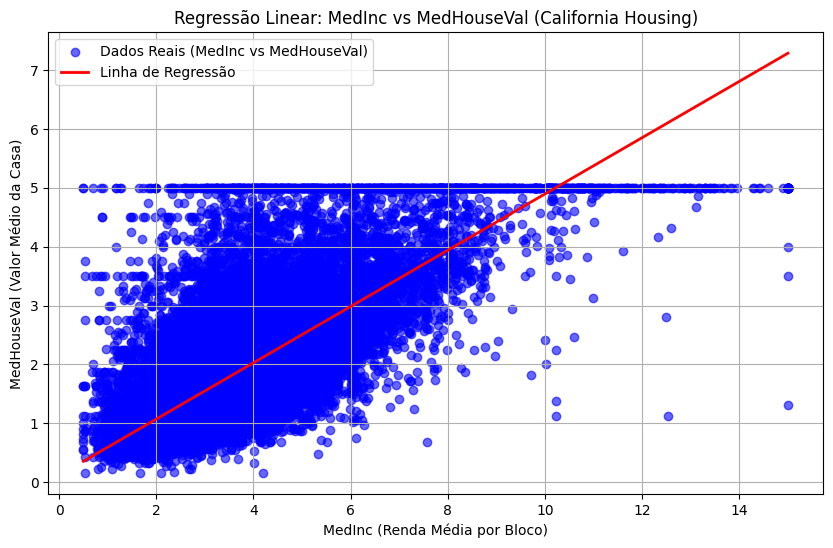

In [43]:

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color="blue", alpha=0.6, label="Dados Reais (MedInc vs MedHouseVal)")

x_min = X_train.min()
x_max = X_train.max()

y_min_pred = m * x_min + b
y_max_pred = m * x_max + b

plt.plot([x_min, x_max], [y_min_pred, y_max_pred], color="red", linewidth=2, label="Linha de Regressão")

plt.xlabel("MedInc (Renda Média por Bloco)")
plt.ylabel("MedHouseVal (Valor Médio da Casa)")
plt.title("Regressão Linear: MedInc vs MedHouseVal (California Housing)")
plt.legend()
plt.grid(True)
plt.show()